In [41]:
import numpy as nm
import pandas as pa
import matplotlib.pyplot as plot
import matplotlib.patches as pat

pa.set_option('display.max_columns',150)

%matplotlib inline

datos = pa.read_csv('Chicago_Crimes_2017.csv')
datos.head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,613,6.0,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
3,10801101,JA100031,01/01/2017 12:00:00 AM,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
4,10801104,JA100015,02/01/2017 12:00:00 AM,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


## Ejercicio 1
### Generar un gráfico de barras que contenga el nº de siniestro ocurridos en cada mes del año:
Lo realizo por dia ya que el csv está mal y todos los datos son de enero. (Llega al 18 de enero)

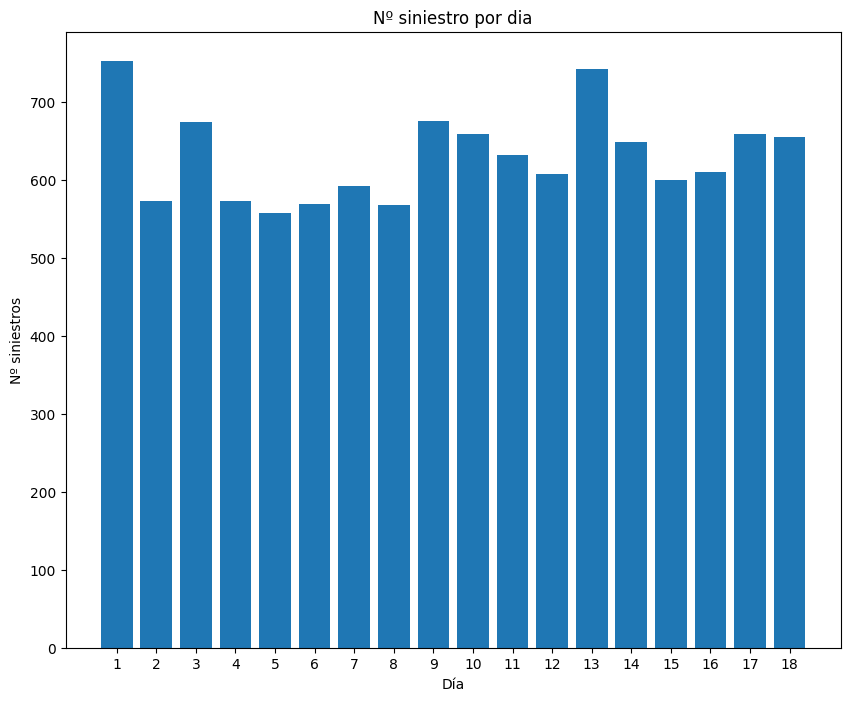

In [42]:
datos['Date'] = pa.to_datetime(datos['Date'])
datos['day'] = datos['Date'].dt.day

crimenesDia = datos.groupby('day').size()

fig, ax =plot.subplots(figsize = (10,8))
ax.bar(x = crimenesDia.index, height = crimenesDia.values)

ax.set_xticks(nm.arange(1,19))
ax.set_title("Nº siniestro por dia")
ax.set_ylabel("Nº siniestros")
ax.set_xlabel('Día')
pass

## Ejercicio 2

Añade al gráfico anterior usando puntos el número de siniestris cuyo Primary Type es Battery

- Representa los puntos usando el eje derecho
- Muestra una leyenda con el significado de ambos

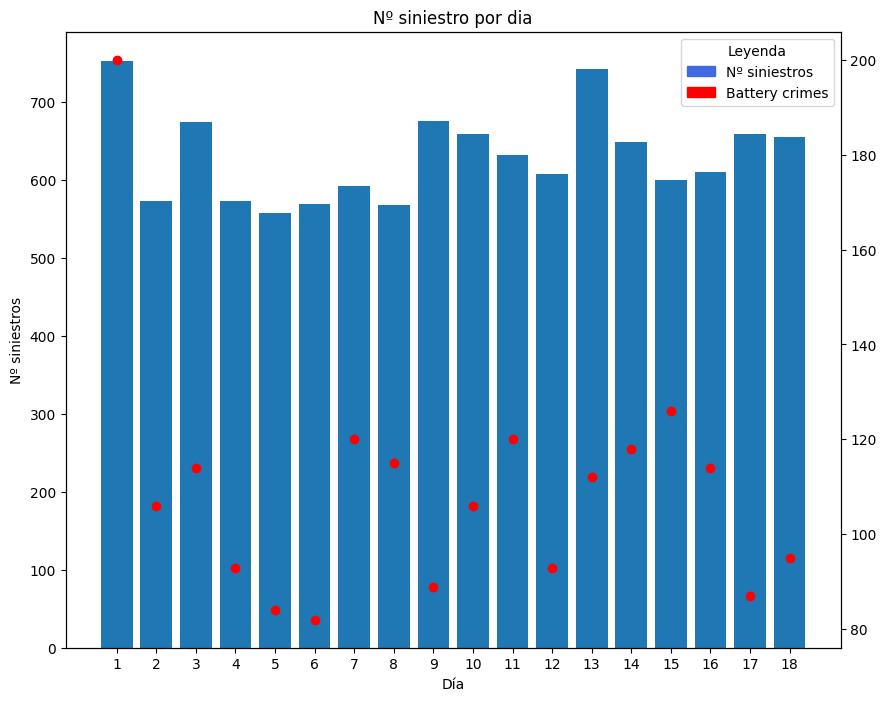

In [56]:
crimenesAgresion = datos[datos['PrimaryType']=="BATTERY"].groupby('day').size() 

fig, ax =plot.subplots(figsize = (10,8))
ax.bar(x = crimenesDia.index, height = crimenesDia.values)

ax.set_xticks(nm.arange(1,19))
ax.set_title("Nº siniestro por dia")
ax.set_ylabel("Nº siniestros")
ax.set_xlabel('Día')

ax1 = ax.twinx()
ax1.scatter(x=crimenesAgresion.index, y=crimenesAgresion.values, c='red', label='Crimenes agresión')

bar = pat.Patch(color='royalblue', label='Nº siniestros')
point = pat.Patch(color='red', label='Battery crimes')
plot.legend(handles=[bar, point], title = 'Leyenda')

## Ejercicio 3
Filtra solo los siniestros cuyo Primary Type son "THEFT", "BATTERY", "CRIMINAL DAMAGE" o "OTHER OFFENSE". Luego, genera 2 gráficos en el mismo fig.

- El primero, será un gráfico de tartas que muestre el % que representa cada tipo en el dataset.
- El segundo, será un gráfico de puntos, representando el nº de siniestros de cada tipo en cada mes

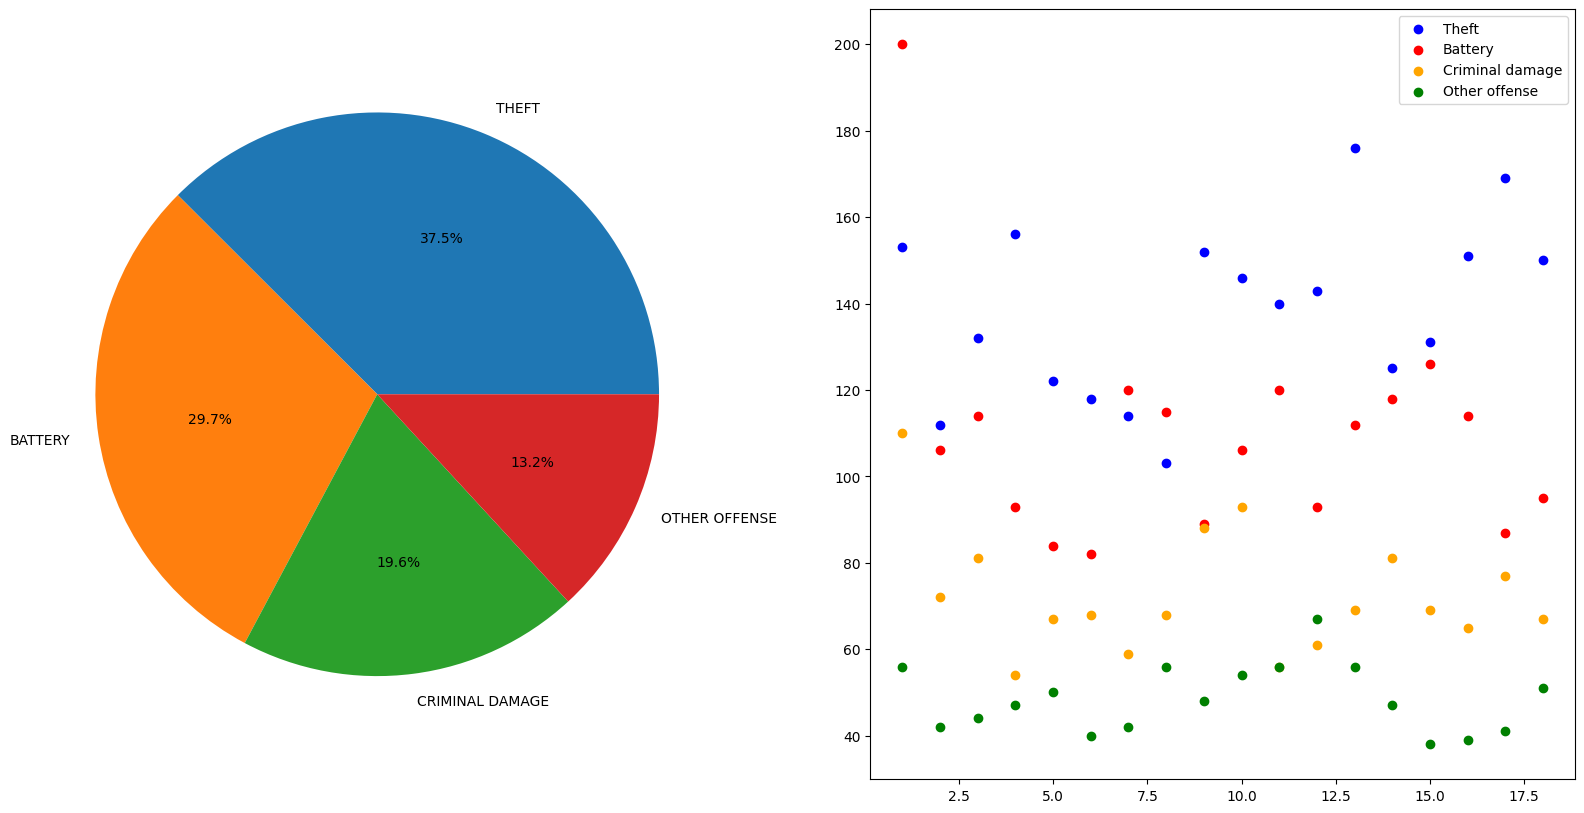

In [61]:
fig, ax = plot.subplots(ncols=2, figsize =(20,10))

dataF = datos.query('PrimaryType in ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE"]')
vc = dataF['PrimaryType'].value_counts(normalize=True).mul(100)
num = dataF.groupby(['PrimaryType','day']).size().unstack().T

ax[0].pie(vc, labels = vc.index, autopct='%1.1f%%')

ax[1].scatter(x = num.index, y = num['THEFT'], c = 'blue', label = 'Theft')
ax[1].scatter(x = num.index, y = num['BATTERY'], c = 'red', label = 'Battery')
ax[1].scatter(x = num.index, y = num['CRIMINAL DAMAGE'], c = 'orange', label = 'Criminal damage')
ax[1].scatter(x = num.index, y = num['OTHER OFFENSE'], c = 'green', label = 'Other offense')
ax[1].legend()

pass